In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

def plot(imgs, titles, img_per_line = 3):
  plt.figure(figsize=(20, 20))
  for i, (img, title) in enumerate(zip(imgs, titles)):
    plt.subplot(img_per_line, img_per_line, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)

def compararImagens(img1, img2):
  total = 0
  iguais = 0
  img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      if img1[i][j] == img2[i][j]:
        iguais += 1
      total += 1
  return iguais/total


def kmeans(img, k):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  pixel_values = img.reshape((-1,3))
  pixel_values = np.float32(pixel_values)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  _,labels,(centers) = cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  labels = labels.flatten()
  segmented_image = centers[labels.flatten()]
  segmented_image = segmented_image.reshape((img.shape))
  return segmented_image

### 1) Aplique o algoritmo de limiarização do Método de Otsu. Utilize-o nas imagens “harewood.jpg”, “nuts.jpg”, “snow.jpg” e “img_aluno”.

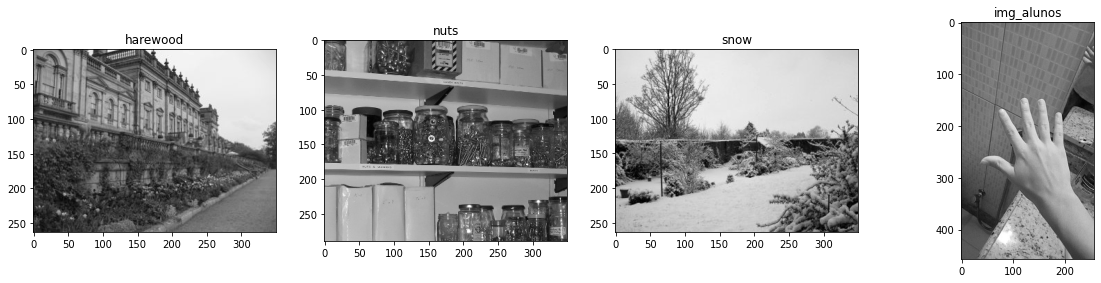

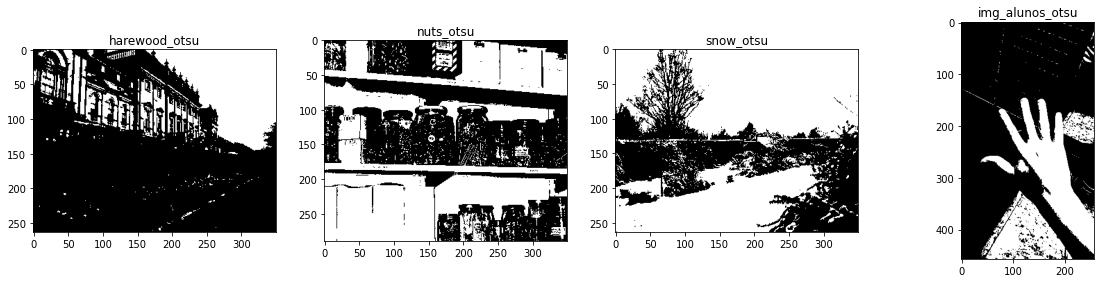

In [5]:
harewood = cv2.imread('harewood.jpg', cv2.IMREAD_GRAYSCALE)
nuts = cv2.imread('nuts.jpg', cv2.IMREAD_GRAYSCALE)
snow = cv2.imread('snow.jpg', cv2.IMREAD_GRAYSCALE)
img_alunos = cv2.imread('img_aluno.jpg', cv2.IMREAD_GRAYSCALE)
plot([harewood, nuts, snow, img_alunos], ['harewood', 'nuts', 'snow', 'img_alunos'], 4)

# metodo de otsu
_, harewood_otsu = cv2.threshold(harewood, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, nuts_otsu = cv2.threshold(nuts, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, snow_otsu = cv2.threshold(snow, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, img_alunos_otsu = cv2.threshold(img_alunos, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plot([harewood_otsu, nuts_otsu, snow_otsu, img_alunos_otsu], ['harewood_otsu', 'nuts_otsu', 'snow_otsu', 'img_alunos_otsu'], 4)

### 2) Considere a pasta de atividade_2 que contém imagens de corpo caloso. Fazer o K-means com objetivo de SEGMENTAR apenas as imagens de corpo caloso. 

Para tanto você terá as imagens de corpo caloso original (com destaque em vermelho da região do corpo caloso. Binarize essas imagen. Depois faça a imagem caloso segmentada pelo k-means para comparar se a segmentação foi boa. 

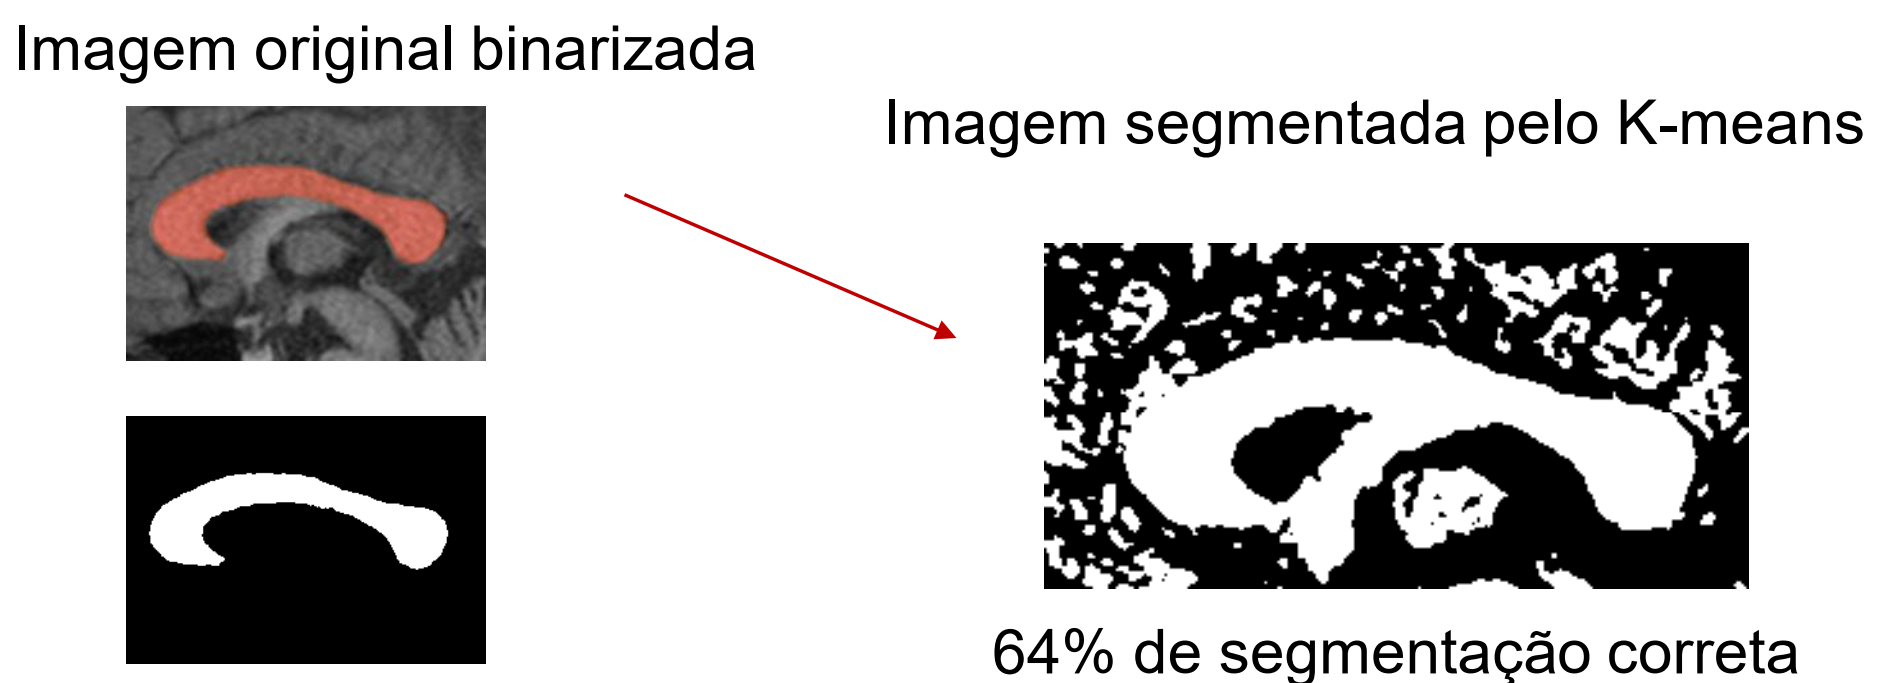

Caso 1:  98.52707581227436
Caso 2:  117.30833333333334
Caso 3:  86.54814814814814
Caso 4:  126.44855967078189


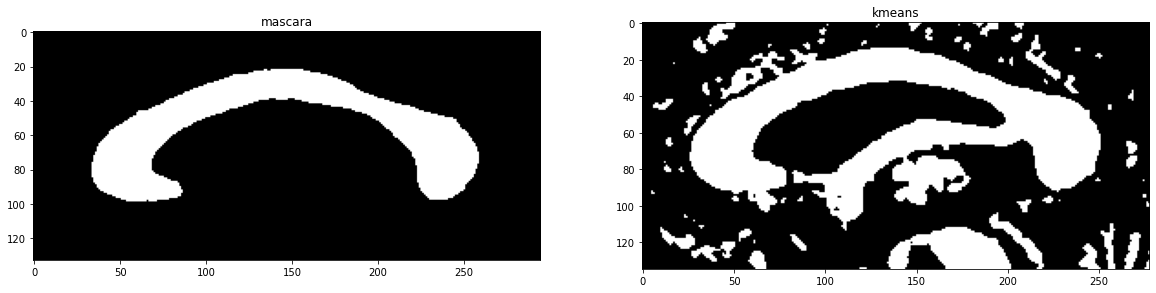

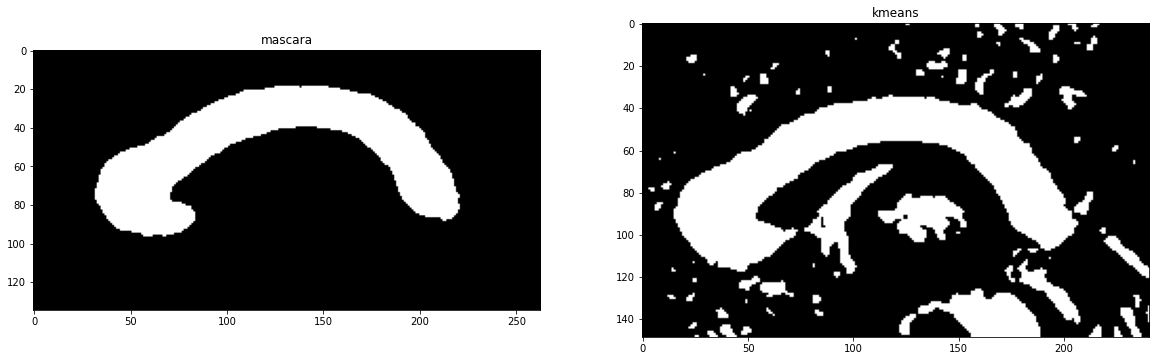

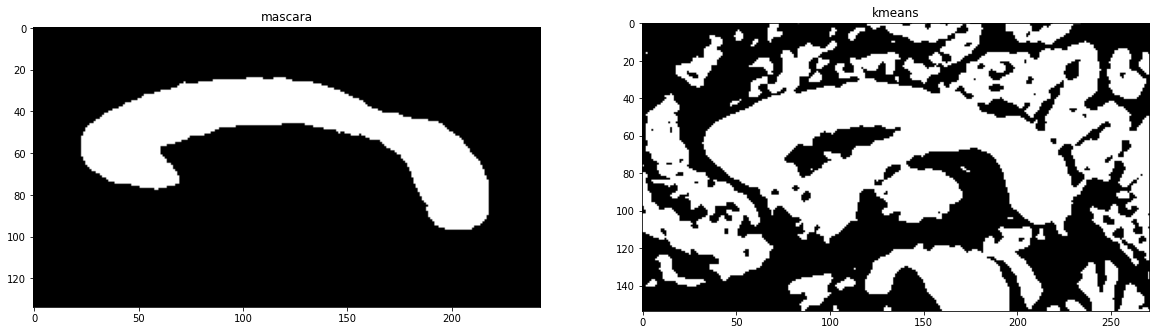

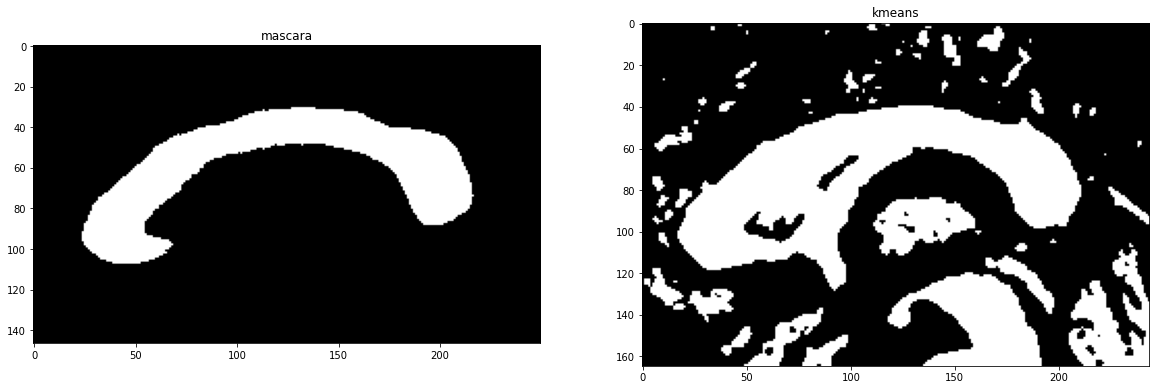

In [21]:
caso_1 = cv2.imread('atividade_2/Caso_1.png')
caso_2 = cv2.imread('atividade_2/Caso_2.png')
caso_3 = cv2.imread('atividade_2/Caso_3.png')
caso_4 = cv2.imread('atividade_2/Caso_4.png')

caso_1_o = cv2.imread('atividade_2/Caso_1_o.png')
caso_2_o = cv2.imread('atividade_2/Caso_2_o.png')
caso_3_o = cv2.imread('atividade_2/Caso_3_o.png')
caso_4_o = cv2.imread('atividade_2/Caso_4_o.png')

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])

caso_1_hsv = cv2.cvtColor(caso_1, cv2.COLOR_BGR2HSV)
caso_2_hsv = cv2.cvtColor(caso_2, cv2.COLOR_BGR2HSV)
caso_3_hsv = cv2.cvtColor(caso_3, cv2.COLOR_BGR2HSV)
caso_4_hsv = cv2.cvtColor(caso_4, cv2.COLOR_BGR2HSV)

mask_caso_1 = cv2.inRange(caso_1_hsv, lower_red, upper_red)
mask_caso_2 = cv2.inRange(caso_2_hsv, lower_red, upper_red)
mask_caso_3 = cv2.inRange(caso_3_hsv, lower_red, upper_red)
mask_caso_4 = cv2.inRange(caso_4_hsv, lower_red, upper_red)

caso_1_o_kmeans = kmeans(caso_1_o, 2)
caso_2_o_kmeans = kmeans(caso_2_o, 2)
caso_3_o_kmeans = kmeans(caso_3_o, 2)
caso_4_o_kmeans = kmeans(caso_4_o, 2)

caso_1_o_kmeans = cv2.inRange(caso_1_o_kmeans,  np.array([0, 0, 0]),  np.array([100, 100, 100]))
caso_2_o_kmeans = cv2.inRange(caso_2_o_kmeans,  np.array([0, 0, 0]),  np.array([100, 100, 100]))
caso_3_o_kmeans = cv2.inRange(caso_3_o_kmeans,  np.array([0, 0, 0]),  np.array([100, 100, 100]))
caso_4_o_kmeans = cv2.inRange(caso_4_o_kmeans,  np.array([0, 0, 0]),  np.array([100, 100, 100]))

caso_1_o_kmeans = cv2.bitwise_not(caso_1_o_kmeans)
caso_2_o_kmeans = cv2.bitwise_not(caso_2_o_kmeans)
caso_3_o_kmeans = cv2.bitwise_not(caso_3_o_kmeans)
caso_4_o_kmeans = cv2.bitwise_not(caso_4_o_kmeans)

print('Caso 1: ', compararImagens(mask_caso_1, caso_1_o_kmeans))
print('Caso 2: ', compararImagens(mask_caso_2, caso_2_o_kmeans))
print('Caso 3: ', compararImagens(mask_caso_3, caso_3_o_kmeans))
print('Caso 4: ', compararImagens(mask_caso_4, caso_4_o_kmeans))

plot([mask_caso_1, caso_1_o_kmeans],['mascara', 'kmeans'], 2)
plot([mask_caso_2, caso_2_o_kmeans], ['mascara', 'kmeans'], 2)
plot([mask_caso_3, caso_3_o_kmeans], ['mascara', 'kmeans'], 2)
plot([mask_caso_4, caso_4_o_kmeans], ['mascara', 'kmeans'], 2)